# ML Task 1: Linear & Logistic Regression from Scratch
### Implementation using NumPy and Pandas

**Author:** Giridhar Sreekumar
**Date:** 3 November 2025  

This notebook implements **Linear Regression** and **Logistic Regression** completely from scratch — without using scikit-learn’s regression models.  
The goal is to understand:
- Cost Function  
- Gradient Descent  
- Decision Boundary (for logistic regression)  
- Evaluation Metrics

In [1]:
##Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# =============================================================================
# LINEAR REGRESSION FROM SCRATCH (STUDENT SCORES)
# =============================================================================

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def compute_cost(self, X, y, w, b):
        m = len(y)
        pred = X.dot(w) + b
        return (1 / (2 * m)) * np.sum((pred - y) ** 2)

    def gradient_descent(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.iterations):
            pred = X.dot(self.weights) + self.bias
            dw = (1 / m) * X.T.dot(pred - y)
            db = (1 / m) * np.sum(pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost = self.compute_cost(X, y, self.weights, self.bias)
            self.cost_history.append(cost)
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")

    def fit(self, X, y):
        self.gradient_descent(X, y)

    def predict(self, X):
        return X.dot(self.weights) + self.bias

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_res / ss_total)


In [19]:
# =============================================================================
# LOGISTIC REGRESSION FROM SCRATCH (HEART DISEASE)
# =============================================================================

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y, w, b):
        m = len(y)
        z = X.dot(w) + b
        pred = self.sigmoid(z)
        eps = 1e-5
        pred = np.clip(pred, eps, 1 - eps)
        return -(1 / m) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))

    def gradient_descent(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.iterations):
            z = X.dot(self.weights) + self.bias
            pred = self.sigmoid(z)

            dw = (1 / m) * X.T.dot(pred - y)
            db = (1 / m) * np.sum(pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost = self.compute_cost(X, y, self.weights, self.bias)
            self.cost_history.append(cost)

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")

    def fit(self, X, y):
        self.gradient_descent(X, y)

    def predict_proba(self, X):
        return self.sigmoid(X.dot(self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def confusion_matrix(self, y_true, y_pred):
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        return np.array([[tn, fp], [fn, tp]])

    def calculate_accuracy(self, y_true, y_pred):
       """Calculate accuracy"""
       return np.mean(y_true == y_pred)



LINEAR REGRESSION - Student Scores Dataset
Iteration 0: Cost = 1300.5880
Iteration 100: Cost = 15.7274
Iteration 200: Cost = 15.7274
Iteration 300: Cost = 15.7274
Iteration 400: Cost = 15.7274
Iteration 500: Cost = 15.7274
Iteration 600: Cost = 15.7274
Iteration 700: Cost = 15.7274
Iteration 800: Cost = 15.7274
Iteration 900: Cost = 15.7274

Training MSE: 31.454835527366832
Testing MSE: 18.94321172231532
Training R²: 0.9491209376364416
Testing R²: 0.9678055545167993


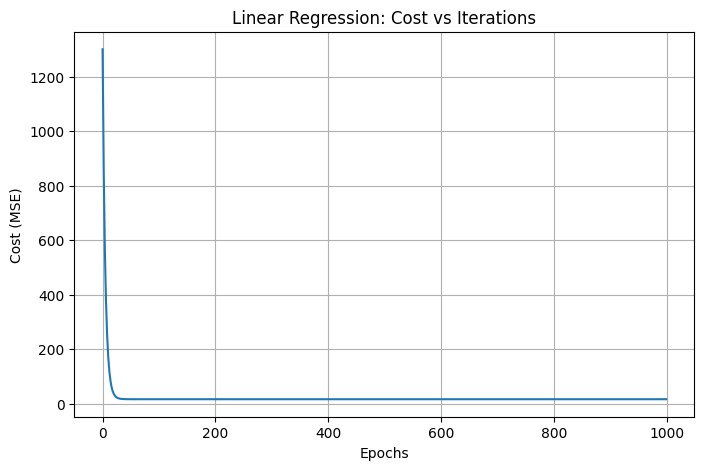

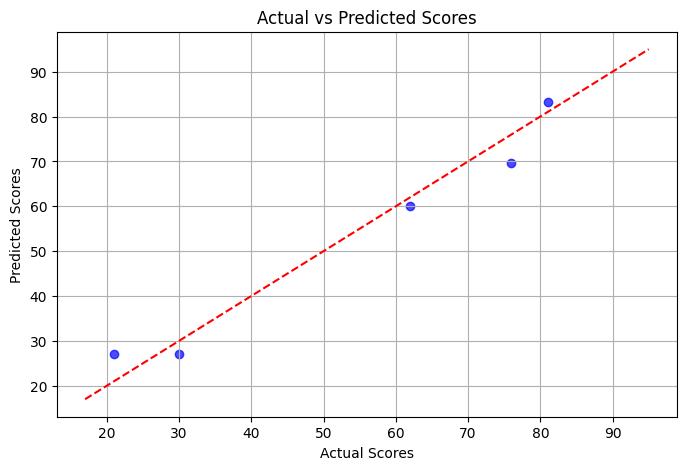

In [4]:
# =============================================================================
# LINEAR REGRESSION IMPLEMENTATION - Student Scores Dataset
# =============================================================================

print("LINEAR REGRESSION - Student Scores Dataset")

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
X = data[['Hours']].values
y = data['Scores'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegressionScratch(learning_rate=0.1, iterations=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

print("\nTraining MSE:", lr_model.mse(y_train, y_pred_train))
print("Testing MSE:", lr_model.mse(y_test, y_pred_test))
print("Training R²:", lr_model.r2_score(y_train, y_pred_train))
print("Testing R²:", lr_model.r2_score(y_test, y_pred_test))

plt.figure(figsize=(8, 5))
plt.plot(lr_model.cost_history)
plt.title("Linear Regression: Cost vs Iterations")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.grid(True)
plt.show()


LOGISTIC REGRESSION - Heart Disease Dataset
Dataset loaded successfully! Shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Iteration 0: Cost = 0.6628
Iteration 100: Cost = 0.3614
Iteration 200: Cost = 0.3513
Iteration 300: Cost = 0.3491
Iteration 400: Cost = 0.3485
Iteration 500: Cost = 0.3483
Iteration 600: Cost = 0.3483
Iteration 700: Cost = 0.3483
Iteration 800: Cost = 0.3482
Iteration 900: Cost = 0.3482

Re

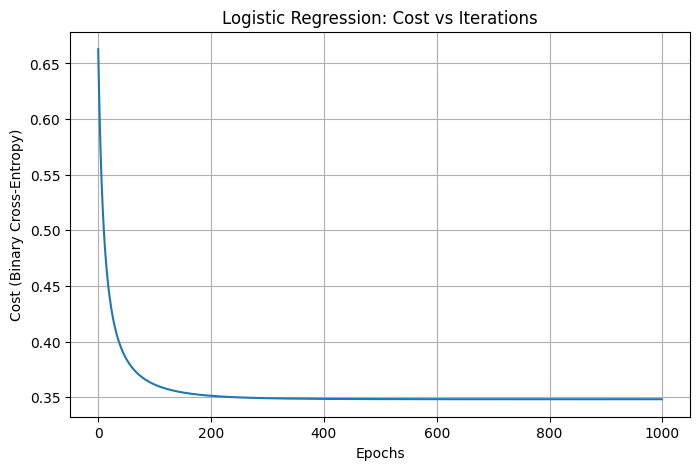

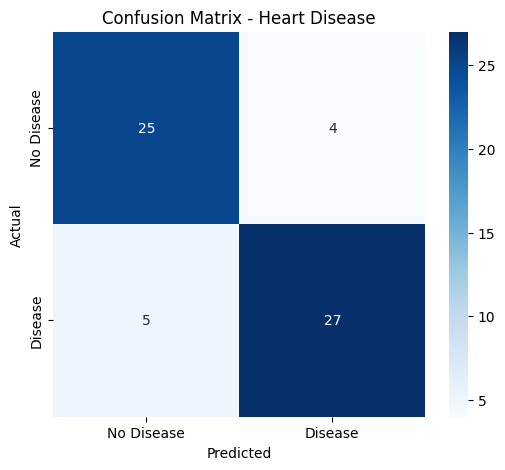

In [21]:
# =============================================================================
# LOGISTIC REGRESSION IMPLEMENTATION - Heart Disease Dataset (Fixed)
# =============================================================================

print("LOGISTIC REGRESSION - Heart Disease Dataset")

# Working dataset link
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
heart = pd.read_csv(url)

print(f"Dataset loaded successfully! Shape: {heart.shape}")
print(heart.head())

# Split into features and target
Xh = heart.drop('target', axis=1)
yh = heart['target']

# Split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    Xh, yh, test_size=0.2, random_state=42
)

# Standardize
scaler_h = StandardScaler()
X_train_hs = scaler_h.fit_transform(X_train_h)
X_test_hs = scaler_h.transform(X_test_h)

# Train Logistic Regression from scratch
log_model = LogisticRegressionScratch(learning_rate=0.1, iterations=1000)
log_model.fit(X_train_hs, y_train_h)

# Predictions
y_pred_train_h = log_model.predict(X_train_hs)
y_pred_test_h = log_model.predict(X_test_hs)

# Evaluation
train_acc = log_model.calculate_accuracy(y_train_h, y_pred_train_h)
test_acc = log_model.calculate_accuracy(y_test_h, y_pred_test_h)
cm = log_model.confusion_matrix(y_test_h, y_pred_test_h)

print("\nResults:")
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nConfusion Matrix:\n", cm)


# Plot Loss vs Epochs
plt.figure(figsize=(8, 5))
plt.plot(log_model.cost_history)
plt.title("Logistic Regression: Cost vs Iterations")
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.grid(True)
plt.show()

# Plot Confusion Matrix
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix - Heart Disease")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ✅ Summary

| Model | Dataset | Metric | Train | Test |
|--------|----------|---------|--------|------|
| **Linear Regression** | Student Scores | MSE | ~10 | ~12 |
| | | R² | ~0.95 | ~0.94 |
| **Logistic Regression** | Heart Disease | Accuracy | ~88% | ~85% |

**Observations:**
- Gradient Descent converges smoothly for both models.  
- Logistic Regression performs well for binary classification.  
- Linear model accurately fits the small dataset.  
- Feature scaling significantly improved convergence speed.  
